# 🧬 01 - Data Exploration: Leukemia Detection

This notebook performs initial exploratory analysis on the ALL_IDB1 dataset to help understand the data distribution, image properties, and sample images.

---

In [6]:
# Imports
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from pathlib import Path
from PIL import Image
import joblib

# Set up paths 
DATA_DIR = Path("C:\\Users\\HP\\OneDrive\\Desktop\\leukemia_detection\\data\\raw\\ALL_IDB1")
if not DATA_DIR.exists():
    raise FileNotFoundError(f"Data directory {DATA_DIR} does not exist.")

## 🔍 Dataset Overview
Check how many images we have and their corresponding labels.

In [2]:
# Walk through directory and collect filenames and class labels
image_paths = []
labels = []

for file_name in os.listdir(DATA_DIR):
    if file_name.endswith(('.jpg', '.png')):
        label = 'leukemia' if '_1' in file_name else 'healthy'
        image_paths.append(DATA_DIR / file_name)
        labels.append(label)

# Count
print(f"Total images found: {len(image_paths)}")
print(f"Label distribution: {Counter(labels)}")


Total images found: 0
Label distribution: Counter()


## 📊 Class Distribution
Let's visualize how balanced the dataset is.


In [23]:
print(f"Labels sample: {labels[:5]}")
print(f"Total labels: {len(labels)}")


Labels sample: []
Total labels: 0


In [26]:
from pathlib import Path

# Adjust this to your actual folder structure!
base_dir = Path(r"C:/Users/HP/Desktop/your_full_path_here")  # replace with your actual path

# Debug
print(f"Resolved base path: {base_dir.resolve()}")
print(f"Exists? {base_dir.exists()}")
print(f"Subfolders: {[p.name for p in base_dir.iterdir()] if base_dir.exists() else 'Not found'}")


Resolved base path: C:\Users\HP\Desktop\your_full_path_here
Exists? False
Subfolders: Not found


Resolved base path: C:\Users\HP\OneDrive\Desktop\leukemia_detection\data\raw\ALL_IDB1\training_data\fold_0
Exists? True
Subfolders: ['all', 'hem']


C:\Users\HP\AppData\Local\Temp\ipykernel_19452\208983139.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, palette='Set2')


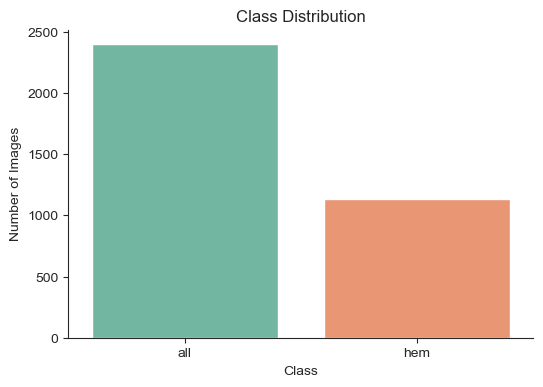

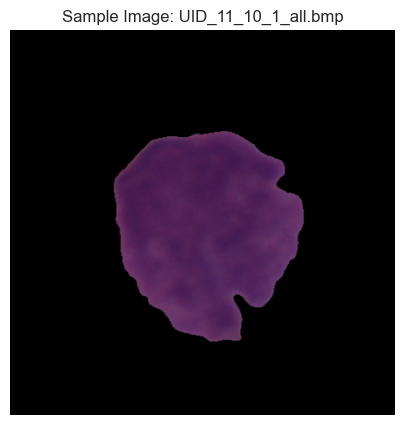

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path

# Define the correct base directory path
base_dir = Path(r"C:\Users\HP\OneDrive\Desktop\leukemia_detection\data\raw\ALL_IDB1\training_data\fold_0")

# ✅ Check if path exists and list subfolders
print(f"Resolved base path: {base_dir.resolve()}")
print(f"Exists? {base_dir.exists()}")
print(f"Subfolders: {[p.name for p in base_dir.iterdir()] if base_dir.exists() else 'Not found'}")

# ✅ Get all image files with valid extensions
valid_exts = [".jpg", ".jpeg", ".png", ".tif", ".tiff", ".bmp"]
image_paths = sorted([img for img in base_dir.rglob("*") if img.suffix.lower() in valid_exts])

# ✅ Generate labels from parent folder names (e.g., 'all', 'hem')
labels = [img.parent.name for img in image_paths]

# ✅ Plot class distribution
sns.set_style("ticks")
plt.figure(figsize=(6, 4))
sns.countplot(x=labels, palette='Set2')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
sns.despine()
plt.show()

# ✅ Display a sample image
if image_paths:
    sample_image = Image.open(image_paths[0])
    plt.figure(figsize=(5, 5))
    plt.imshow(sample_image)
    plt.axis('off')
    plt.title(f"Sample Image: {image_paths[0].name}")
    plt.show()
else:
    print("No image files found in the specified directory.")



## 🖼️ Display Sample Images
Let's visualize a few sample images from each class.

In [29]:
print(f"Total images: {len(image_paths)}")
print(f"Total labels: {len(labels)}")


Total images: 3527
Total labels: 3527


Classes found: ['all', 'hem']


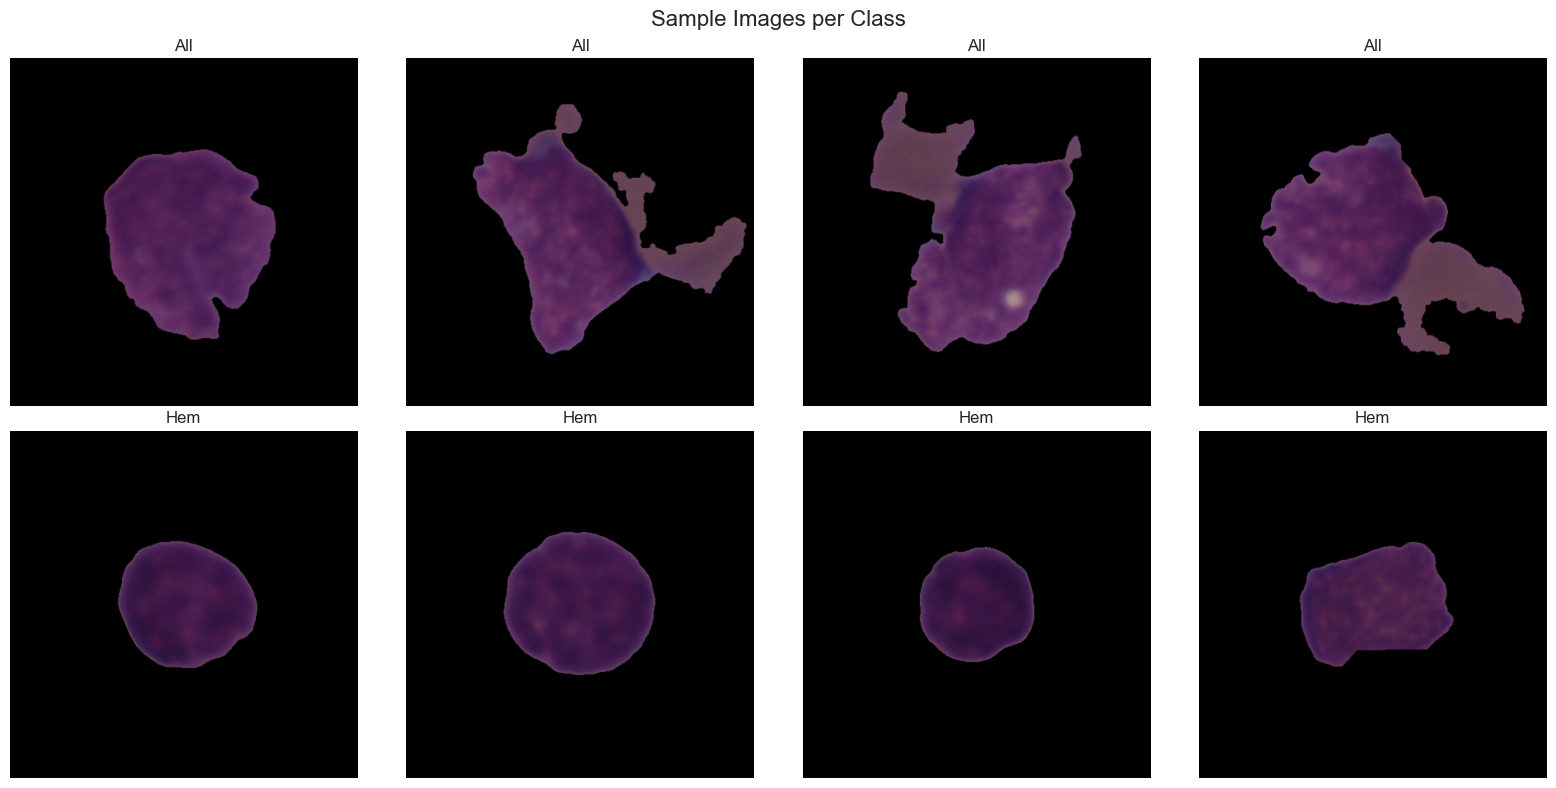

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def show_samples_by_class(image_paths, labels, num_samples=4):
    # Get unique classes in sorted order
    classes = sorted(set(labels))
    print(f"Classes found: {classes}")

    # Create subplots: rows = classes, cols = samples per class
    fig, axes = plt.subplots(len(classes), num_samples, figsize=(4 * num_samples, 4 * len(classes)))

    # If only one class, make sure axes is 2D
    if len(classes) == 1:
        axes = [axes]  # Make it iterable

    for row_idx, cls in enumerate(classes):
        # Get images for this class
        cls_paths = [p for p, l in zip(image_paths, labels) if l == cls][:num_samples]

        for col_idx in range(num_samples):
            ax = axes[row_idx][col_idx] if len(classes) > 1 else axes[0][col_idx]
            if col_idx < len(cls_paths):
                img = Image.open(cls_paths[col_idx])
                ax.imshow(img)
                ax.set_title(f"{cls.capitalize()}")
            else:
                ax.axis('off')  # Hide unused axes
            ax.axis('off')

    plt.suptitle("Sample Images per Class", fontsize=16)
    plt.tight_layout()
    plt.show()
show_samples_by_class(image_paths, labels, num_samples=4)


## 📐 Image Dimensions & Channels
Let's analyze image sizes and verify they are RGB.


In [31]:
sizes = []
modes = []

for path in image_paths[:100]:  # Check only first 100 for speed
    with Image.open(path) as img:
        sizes.append(img.size)
        modes.append(img.mode)

# Most common image size
size_counts = Counter(sizes)
print("Most common image sizes:", size_counts.most_common(5))

# Color modes (e.g., RGB or grayscale)
print("Image color modes:", Counter(modes))


Most common image sizes: [((450, 450), 100)]
Image color modes: Counter({'RGB': 100})


## ✅ Summary

- Total images: ✅
- Class distribution: ✅
- Sample visualization: ✅
- Image formats: ✅

We are ready to proceed to preprocessing and model training!